<a href="https://colab.research.google.com/github/hodacquan99/BML/blob/main/dapan_de_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MÃ NGUỒN

In [ ]:
import numpy as np
import math
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [ ]:
def cau_mot():
    print('\n========================================= CÂU 1 =========================================')
    X = np.array([6, 7, 9, 9, 7, 8, 6, 12])
    Y = np.array([45, 80, 70, 85, 60, 55, 75, 90])
    lm = sm.ols('y~x', data=pd.DataFrame({'x': X, 'y': Y})).fit()
    print(f'Hệ số tương quan: {np.corrcoef(X, Y)[0, 1].round(4)}')

    print('\nHệ số mô hình: ')
    print(lm.params)
    print(f'Phương trình hồi quy: Y = {lm.params[0].round(4)} + {lm.params[1].round(4)}X')
    x_min = 6
    y_min = lm.params[0] + lm.params[1]*x_min
    x_max = 12
    y_max = lm.params[0] + lm.params[1]*x_max

    print('\nĐồ thị:')
    plt.plot([x_min, x_max], [y_min, y_max])
    plt.plot(X, Y, 'ro')
    plt.show()

def cau_hai(STT):
    print('\n========================================= CÂU 2 =========================================')
    Y = (STT % 10) + 10
    ftable = [(205, Y), (215, 17), (225, 20), (235, 18), (245, 15)]
    data = sum([[v]*f for v, f in ftable], [])
    
    n = len(data)
    tb = np.mean(data).round(4)
    dlc = np.std(data, ddof=1).round(4)
    dlc_tb = dlc/math.sqrt(n)
    saiso_tb = round(st.t.isf((1-0.95)/2, n-1) * dlc_tb, 4)
    
    f = (18 + 15) / n
    dlc_tyle = math.sqrt((f*(1-f)) / n)    
    saiso_tyle = round(st.norm.isf((1 - 0.9)/2).round(2) * dlc_tyle, 4)

    print(f'Y = {Y}')
    print('Dữ liệu: ', data)
    print(f'\nn = {n}, f={round(f, 4)}, tb = {tb}, dlc={dlc}')
    
    print('\nCâu a: (1 điểm)')    
    print('\tKết quả theo thư viện: ', st.norm.interval(0.9, loc=f, scale=dlc_tyle))
    print('\tSai số = ', saiso_tyle)
    print('\tKết quả theo công thức: ({0}, {1})'.format((f-saiso_tyle).round(4), (f+saiso_tyle).round(4)))

    print('\nCâu b: (1 điểm)')
    print('\tKết quả theo hàm pp Chuẩn:   ', st.norm.interval(0.95, loc=tb, scale=dlc_tb))
    print('\tKết quả theo hàm pp Student: ', st.t.interval(0.95, n-1, loc=tb, scale=dlc_tb))
    print('\tSai số = ', saiso_tb)
    print('\tKết quả theo công thức: ({0}, {1})'.format((tb-saiso_tb).round(4), (tb+saiso_tb).round(4)))
    
    print('\nCâu c: (1 điểm)')

    print('\nCâu d: (1 điểm)')
    print('\tĐộ rộng khoảng ước lượng giảm xuống một nửa')
    
def cau_ba(STT):
    print('\n========================================= CÂU 3 =========================================')
    M = (STT % 10) + 65    
    data = np.array([65,74, 69, 68, 68, 72, 72, 73, 71, 75, 74, 68, 67, 69, 67, 68, 67, 70, 68, 68, 68, 71, 67, 70, 69, 69, 69, 67, 72, 66, 67, M])

    mu_zero = 70
    p = 0.1
    alpha_a = 0.05
    alpha_b = 0.1
    
    n = len(data)
    tb = np.mean(data).round(4)
    dlc = 2.5
    dlc_tb = dlc/math.sqrt(n)
    f = (data > 72).sum() / n
    
    print('Câu a: ')
    print('\tGiả thuyết:')
    print('\t\tHo: mu >= 70')
    print('\t\tHa: mu < 70')
    
    trikiemdinh = ((tb-mu_zero)/dlc_tb).round(4)
    p_value = st.norm.cdf(trikiemdinh).round(4)
   
    print(f'\n\tn = {n}, tb =  {tb}, sigma = {dlc}')
    print(f'\n\tTrị kiểm định: t = {trikiemdinh}, z_alpha = {-st.norm.isf(alpha_a).round(4)}' )
    print(f'\n\tp_value = {p_value}, alpha = {alpha_a}')
    
    
    print('\nCâu b: ')    
    print('\tGiả thuyết:')
    print('\t\tHo: p = 0.5')
    print('\t\tHa: p <> 0.5')
    
    dlc_tyle = math.sqrt((p*(1-p)) / n)
    trikiemdinh_z = round((f-p)/dlc_tyle, 4)
    p_value_tyle = (st.norm.sf(abs(trikiemdinh_z)).round(4) * 2)
    
    print(f'\n\tn = {n}, f =  {round(f, 4)}')
    print(f'\n\tTrị kiểm định: z = {trikiemdinh_z}, z_alpha_chia_2 = {st.norm.isf(alpha_b/2).round(4)}' )
    print(f'\n\tp_value = {p_value_tyle}, alpha = {alpha_a}')

def dap_an(STT):
    print(f'\nSTT: {STT}')
    
    cau_mot()
    cau_hai(STT)
    cau_ba(STT)

## ĐÁP ÁN


STT: 2

========================================= CÂU 1 =========================================
Hệ số tương quan: 0.6188

Hệ số mô hình: 
Intercept    31.428571
x             4.821429
dtype: float64
Phương trình hồi quy: Y = 31.4286 + 4.8214X

Đồ thị:


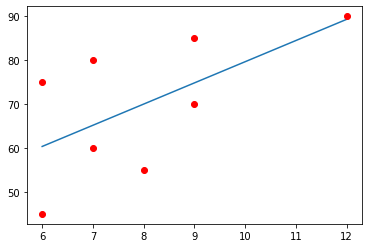


========================================= CÂU 2 =========================================
Y = 12
Dữ liệu:  [205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245]

n = 82, f=0.4024, tb = 225.8537, dlc=13.2592

Câu a: (1 điểm)
	Kết quả theo thư viện:  (0.31336286408602465, 0.49151518469446315)
	Sai số =  0.0888
	Kết quả theo công thức: (0.3136, 0.4912)

Câu b: (1 điểm)
	Kết quả theo hàm pp Chuẩn:    (222.9838547016079, 228.7235452983921)
	Kết quả theo hàm pp Student:  (222.9403342519155, 228.76706574808452)
	Sai số =  2.9134
	Kết quả theo công thức: (222.9403, 228.7671)

Câu c: (1 điểm)

Câu d: (1 điểm)
	Độ rộng khoảng ước lượng giảm xuố

In [ ]:
# Thay đổi tham số tương ứng với từng sinh viên (Số thứ tụ-STT, Ba chữ số áp cuối-BCS)
STT = 2

dap_an(STT)